In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/customer_intelligence_dataset.csv")

print(df.shape)
print(df.head())
print("Columns:", df.columns.tolist())

(8000, 18)
   sale_id customer_id product_id product_name     category  price  quantity  \
0  S000001   CUST01553       P004         Desk    Furniture  12000         2   
1  S000002   CUST00161       P010    Projector  Electronics  45000         2   
2  S000003   CUST00627       P010    Projector  Electronics  45000         4   
3  S000004   CUST01291       P009      Monitor  Electronics  12000         1   
4  S000005   CUST01456       P004         Desk    Furniture  12000         4   

    sale_date  total_value  age  gender region         segment  churn  \
0  2020-01-07        24000   40  Female   West  Small Business      1   
1  2023-11-10        90000   50  Female   West       Corporate      0   
2  2022-07-04       180000   33    Male  South       Corporate      0   
3  2023-10-18        12000   41    Male   West        Consumer      0   
4  2023-09-13        48000   60  Female   West        Consumer      0   

   tenure_months last_purchase_date                             feedb

In [23]:
print("Age summary:")
print(df["age"].describe())

invalid_ages = df[(df["age"] < 18) | (df["age"] > 100)]
print(f"Invalid ages found: {len(invalid_ages)}")

Age summary:
count    8000.000000
mean       41.483875
std        13.331802
min        18.000000
25%        30.000000
50%        42.000000
75%        53.000000
max        64.000000
Name: age, dtype: float64
Invalid ages found: 0


In [24]:
print("Unique churn values:", df["churn"].unique())

Unique churn values: [1 0]


In [25]:
print("Tenure months summary:")
print(df["tenure_months"].describe())
print("Negative values:", (df["tenure_months"] < 0).sum())

Tenure months summary:
count    8000.000000
mean       29.721125
std        17.342821
min         1.000000
25%        14.000000
50%        30.000000
75%        45.000000
max        59.000000
Name: tenure_months, dtype: float64
Negative values: 0


In [26]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
sale_id               0
customer_id           0
product_id            0
product_name          0
category              0
price                 0
quantity              0
sale_date             0
total_value           0
age                   0
gender                0
region                0
segment               0
churn                 0
tenure_months         0
last_purchase_date    0
feedback_text         0
sentiment             0
dtype: int64


In [27]:
print("Sale date range:", df["sale_date"].min(), "to", df["sale_date"].max())

Sale date range: 2020-01-01 to 2023-12-31


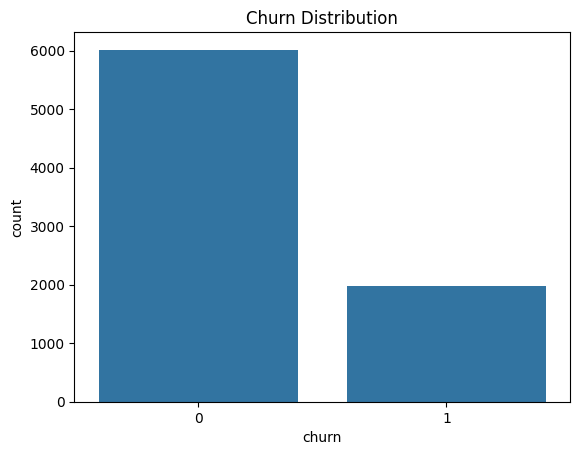

churn
0    0.751875
1    0.248125
Name: proportion, dtype: float64


In [28]:
#Churn Distribution
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()

print(df["churn"].value_counts(normalize=True).rename("proportion"))

In [29]:
for c in ["sale_date","last_purchase_date"]:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors="coerce")

df.head()

,sale_id,customer_id,product_id,product_name,category,price,quantity,sale_date,total_value,age,gender,region,segment,churn,tenure_months,last_purchase_date,feedback_text,sentiment
0,S000001,CUST01553,P004,Desk,Furniture,12000,2,2020-01-07,24000,40,Female,West,Small Business,1,37,2023-04-04,"Terrible experience, will not buy again.",Negative
1,S000002,CUST00161,P010,Projector,Electronics,45000,2,2023-11-10,90000,50,Female,West,Corporate,0,44,2023-03-02,Excellent customer service.,Positive
2,S000003,CUST00627,P010,Projector,Electronics,45000,4,2022-07-04,180000,33,Male,South,Corporate,0,25,2023-11-04,Product quality could be better.,Neutral
3,S000004,CUST01291,P009,Monitor,Electronics,12000,1,2023-10-18,12000,41,Male,West,Consumer,0,56,2023-08-18,"Delivery was late, not happy.",Positive
4,S000005,CUST01456,P004,Desk,Furniture,12000,4,2023-09-13,48000,60,Female,West,Consumer,0,52,2023-05-14,"Delivery was late, not happy.",Positive


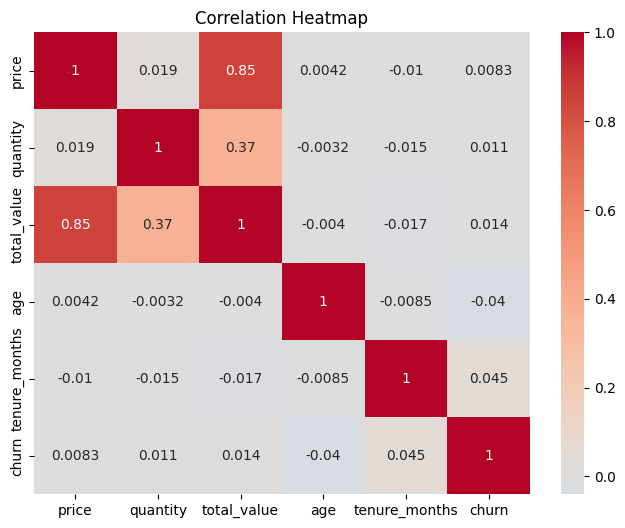

In [30]:
# Correlation Heatmap (numeric features only)
num_cols = ["price", "quantity", "total_value", "age", "tenure_months", "churn"]

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [31]:
# churn to int if present
if "churn" in df.columns:
    df["churn"] = pd.to_numeric(df["churn"], errors="coerce").fillna(0).astype(int)

In [32]:
# Outlier handling: simple IQR capping on continuous numeric cols

cols_to_cap = ["price", "total_value", "age", "tenure_months"]  # leaving 'quantity' and 'churn' alone

# remember dtypes so we can cast back (clip can make floats)
orig_dtypes = {c: df[c].dtype for c in cols_to_cap}

for c in cols_to_cap:
    s = df[c].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    df[c] = df[c].clip(lower=low, upper=high)

# cast back to original dtypes (they're ints in your data)
for c in cols_to_cap:
    if pd.api.types.is_integer_dtype(orig_dtypes[c]):
        df[c] = df[c].round().astype(orig_dtypes[c])

print("Applied IQR capping to:", cols_to_cap)

Applied IQR capping to: ['price', 'total_value', 'age', 'tenure_months']


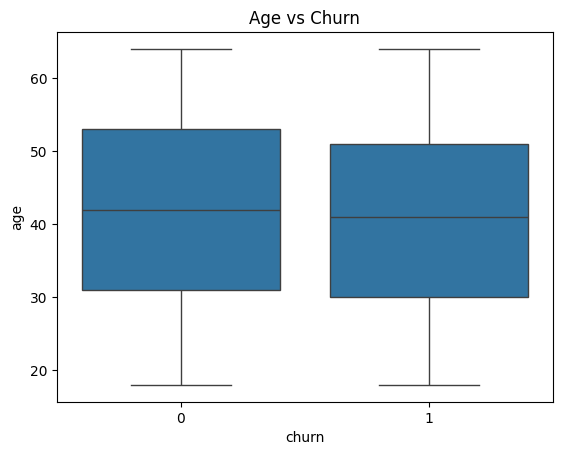

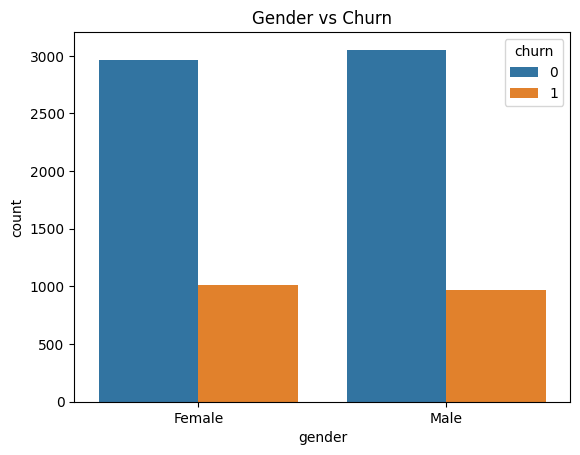

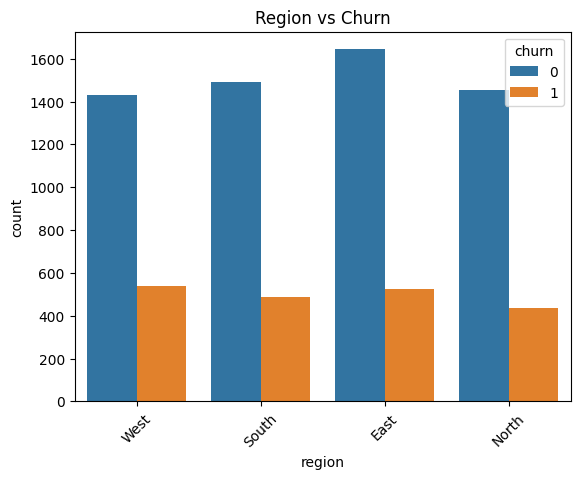

In [33]:
# Demographics vs Churn

# Age
sns.boxplot(x='churn', y='age', data=df)
plt.title("Age vs Churn")
plt.show()

# Gender
sns.countplot(x='gender', hue='churn', data=df)
plt.title("Gender vs Churn")
plt.show()

# Region
sns.countplot(x='region', hue='churn', data=df)
plt.title("Region vs Churn")
plt.xticks(rotation=45)
plt.show()

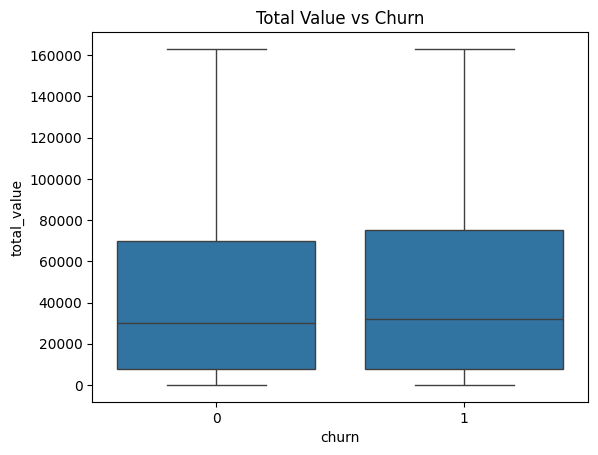

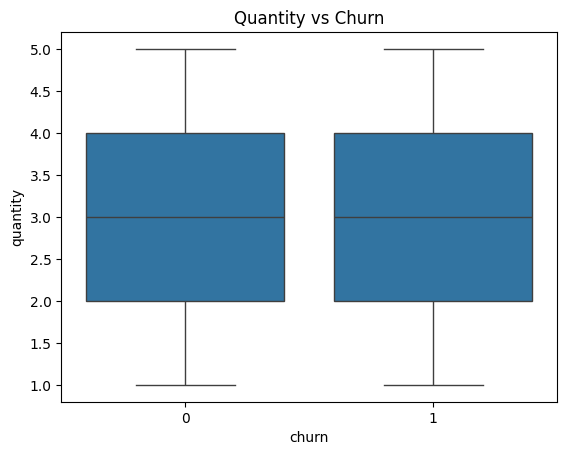

In [34]:
# Churn vs Transactions
# Spending
sns.boxplot(x='churn', y='total_value', data=df)
plt.title("Total Value vs Churn")
plt.show()

# Quantity
sns.boxplot(x='churn',y='quantity',data=df)
plt.title("Quantity vs Churn")
plt.show()

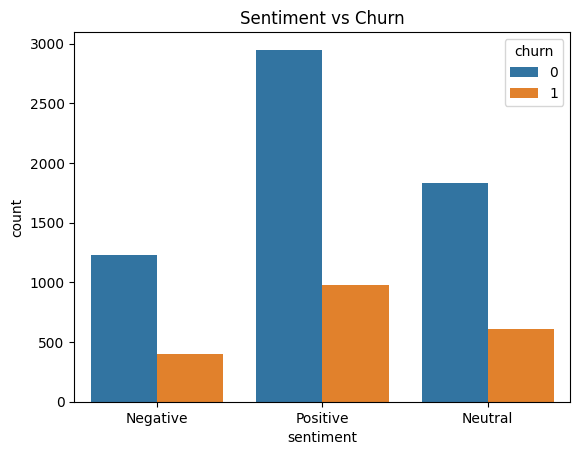

In [35]:
sns.countplot(x="sentiment", hue='churn', data=df)
plt.title("Sentiment vs Churn")
plt.show()

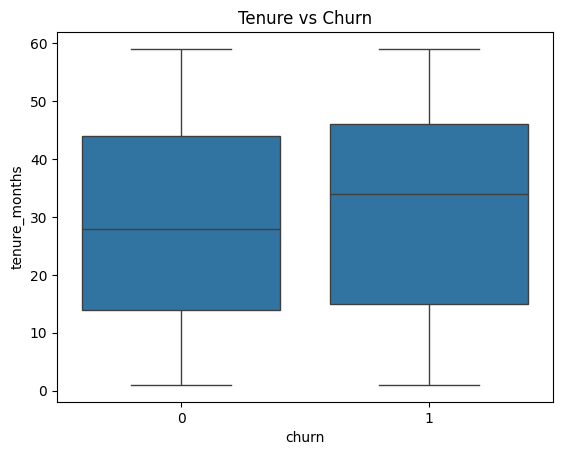

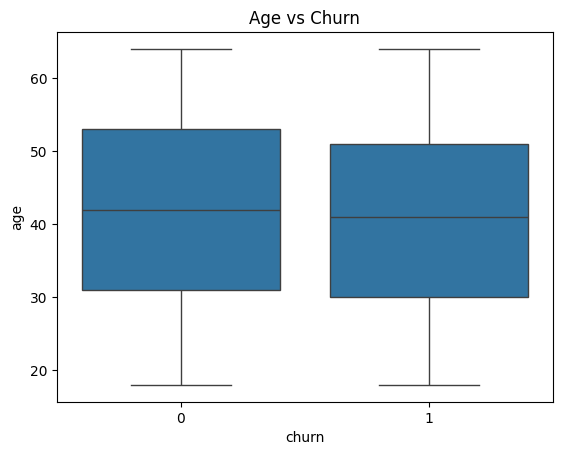

Columns in dataset: ['sale_id', 'customer_id', 'product_id', 'product_name', 'category', 'price', 'quantity', 'sale_date', 'total_value', 'age', 'gender', 'region', 'segment', 'churn', 'tenure_months', 'last_purchase_date', 'feedback_text', 'sentiment']


In [36]:
# Tenure (in months)
sns.boxplot(x='churn', y='tenure_months', data=df)
plt.title("Tenure vs Churn")
plt.show()

# Age
sns.boxplot(x='churn', y='age', data=df)
plt.title("Age vs Churn")
plt.show()

# Check which columns exist
print("Columns in dataset:", df.columns.tolist())

Churn distribution:
churn
0    6015
1    1985
Name: count, dtype: int64
churn
0    0.751875
1    0.248125
Name: proportion, dtype: float64


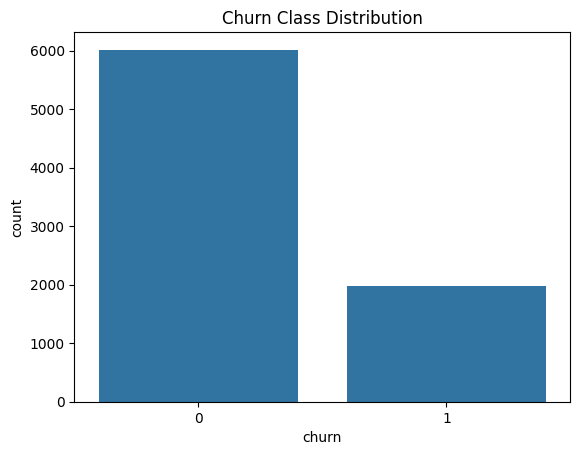

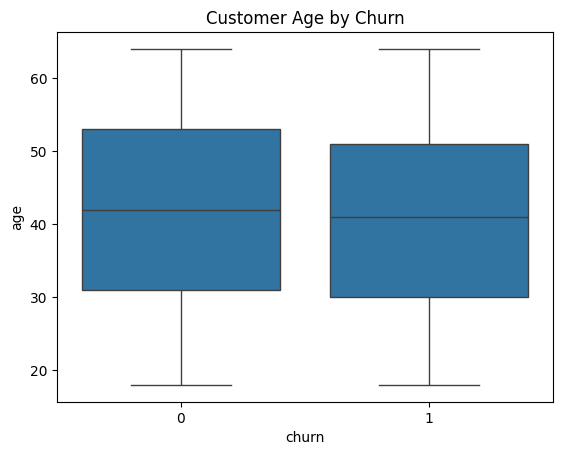

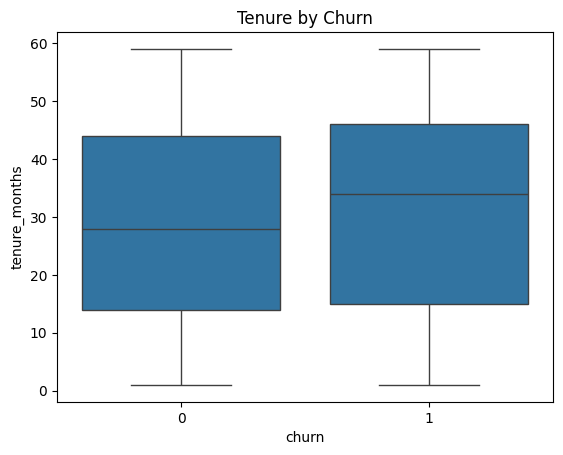

In [37]:
# Class balance
print("Churn distribution:")
print(df['churn'].value_counts())
print(df['churn'].value_counts(normalize=True))

sns.countplot(x='churn', data=df)
plt.title("Churn Class Distribution")
plt.show()

# Churn vs Age
sns.boxplot(x="churn", y="age", data=df)
plt.title("Customer Age by Churn")
plt.show()

# Churn vs Tenure
sns.boxplot(x="churn", y="tenure_months", data=df)
plt.title("Tenure by Churn")
plt.show()

In [38]:
# Snapshot date = last observed sale date in the dataset
snapshot_date = df["sale_date"].max()

# RFM per customer
rfm = (
    df.groupby("customer_id", as_index=False)
      .agg(
          last_purchase=("last_purchase_date", "max"),
          frequency=("sale_id", "count"),
          monetary=("total_value", "sum")
      )
)

# Recency in days (lower is more recent)
rfm["recency"] = (snapshot_date - rfm["last_purchase"]).dt.days

# Keeping just the RFM columns
rfm = rfm[["customer_id", "recency", "frequency", "monetary"]]

# One churn label per customer (max over their rows)
cust_churn = (
    df.sort_values("sale_date")
      .groupby("customer_id", as_index=False)["churn"]
      .max()
      .assign(churn=lambda x: x["churn"].astype(int))
)

# Merging churn into RFM
rfm_churn = rfm.merge(cust_churn, on="customer_id", how="left")
rfm_churn["churn"] = rfm_churn["churn"].fillna(0).astype(int)

print(rfm_churn.head())
print("RFM rows:", len(rfm_churn))

  customer_id  recency  frequency  monetary  churn
0   CUST00001      166          2    187000      0
1   CUST00002      187          4     84300      1
2   CUST00003      328          4    130150      0
3   CUST00004       33          5    302000      0
4   CUST00005      270          1      8000      0
RFM rows: 1967


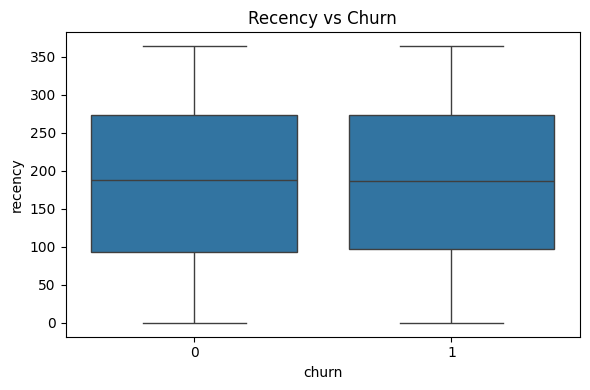

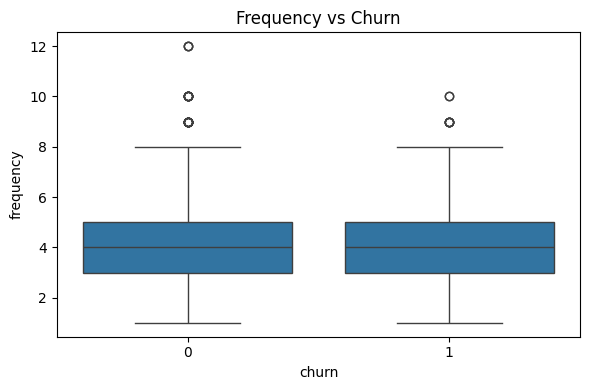

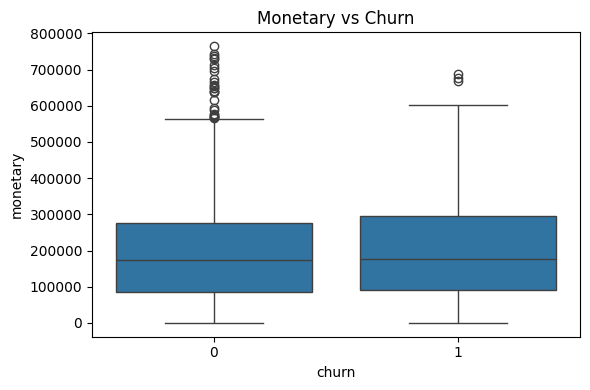

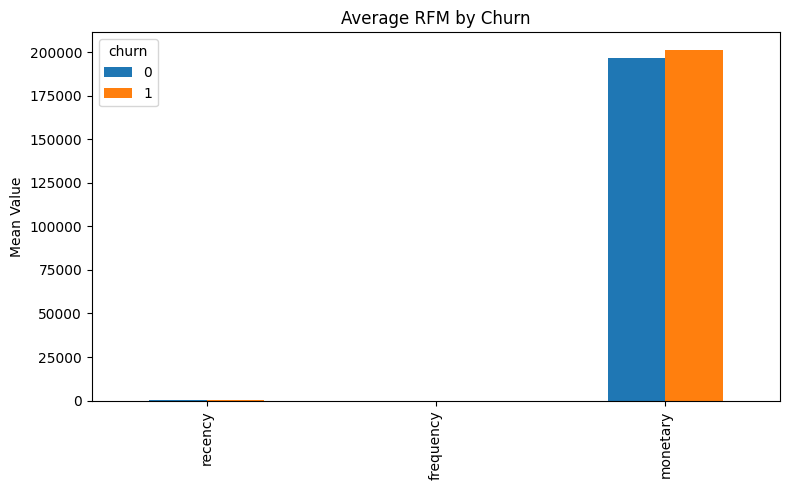

In [39]:
rfm_cols = ["recency", "frequency", "monetary"]

# Boxplots by churn
for col in rfm_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="churn", y=col, data=rfm_churn)
    plt.title(f"{col.title()} vs Churn")
    plt.tight_layout()
    plt.show()

# Mean comparison bar chart
rfm_means = rfm_churn.groupby("churn")[rfm_cols].mean().T
ax = rfm_means.plot(kind="bar", figsize=(8,5), title="Average RFM by Churn")
ax.set_ylabel("Mean Value")
plt.tight_layout()
plt.show()

Correlation of RFM features with churn:
 churn        1.000000
monetary     0.014518
recency      0.000035
frequency   -0.009875
Name: churn, dtype: float64


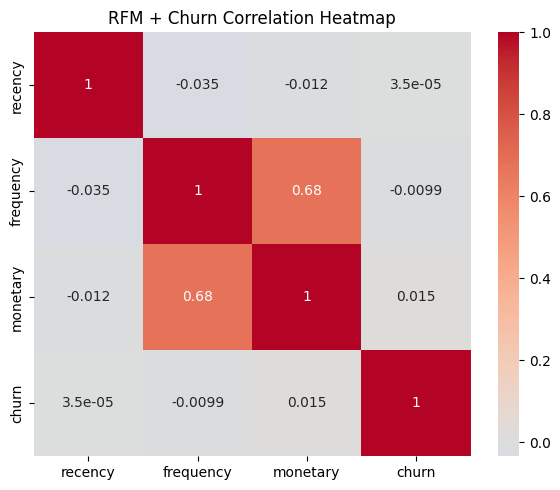

In [40]:
corrs = rfm_churn[rfm_cols + ["churn"]].corr()["churn"].sort_values(ascending=False)
print("Correlation of RFM features with churn:\n", corrs)

# Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(rfm_churn[rfm_cols + ["churn"]].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("RFM + Churn Correlation Heatmap")
plt.tight_layout()
plt.show()

Churn rate by sentiment:
 sentiment
Neutral     0.249182
Positive    0.249109
Negative    0.244172
Name: churn, dtype: float64


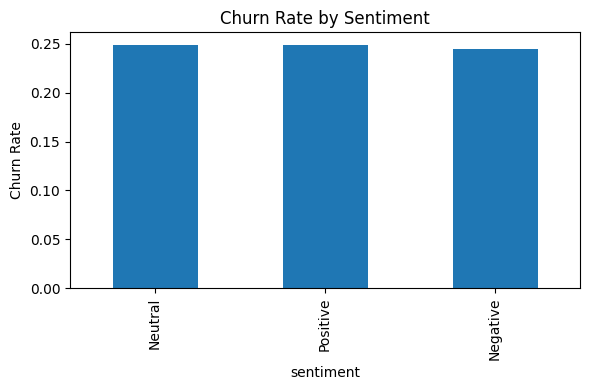

In [41]:
# Churn rate by sentiment (from the raw df)
sent_churn = df.groupby("sentiment")["churn"].mean().sort_values(ascending=False)
print("Churn rate by sentiment:\n", sent_churn)

ax = sent_churn.plot(kind="bar", figsize=(6,4), title="Churn Rate by Sentiment")
ax.set_ylabel("Churn Rate")
plt.tight_layout()
plt.show()

In [42]:
df.to_csv("../data/interim/sales_joined_cleaned.csv", index=False)
print("Saved -> data/interim/sales_joined_cleaned.csv")

Saved -> data/interim/sales_joined_cleaned.csv
